In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [23]:
KEGG_df = pd.read_parquet("../data/processed/enzymemap_Kegg_JN_mapped_non_unique.parquet")
KEGG_df['top_mapped_operator'] = KEGG_df['top_mapped_operator'].fillna("None")
KEGG_df = KEGG_df[~KEGG_df['unmapped'].duplicated()] # unique rxns only


MetaCyc_df = pd.read_parquet("../data/processed/enzymemap_MetaCyc_JN_mapped_non_unique.parquet")
MetaCyc_df['top_mapped_operator'] = MetaCyc_df['top_mapped_operator'].fillna("None")
MetaCyc_df = MetaCyc_df[~MetaCyc_df['unmapped'].duplicated()] # unique rxns only

Brenda_df = pd.read_parquet("../data/interim/enzymemap_v2_brenda2023_JN_mapped_unique_rxns.parquet")
Brenda_df['top_mapped_operator'] = Brenda_df['top_mapped_operator'].fillna("None")
Brenda_df = Brenda_df[~Brenda_df['unmapped'].duplicated()] # unique rxns only

In [24]:
def extract_rule_num(x):
    if x == "None":
        return np.inf   # sort None last
    m = re.search(r'rule(\d+)', x)
    return int(m.group(1)) if m else np.inf

#### Visualizing the count distribution of KEGG reactions mapped to first 50 reaction rules

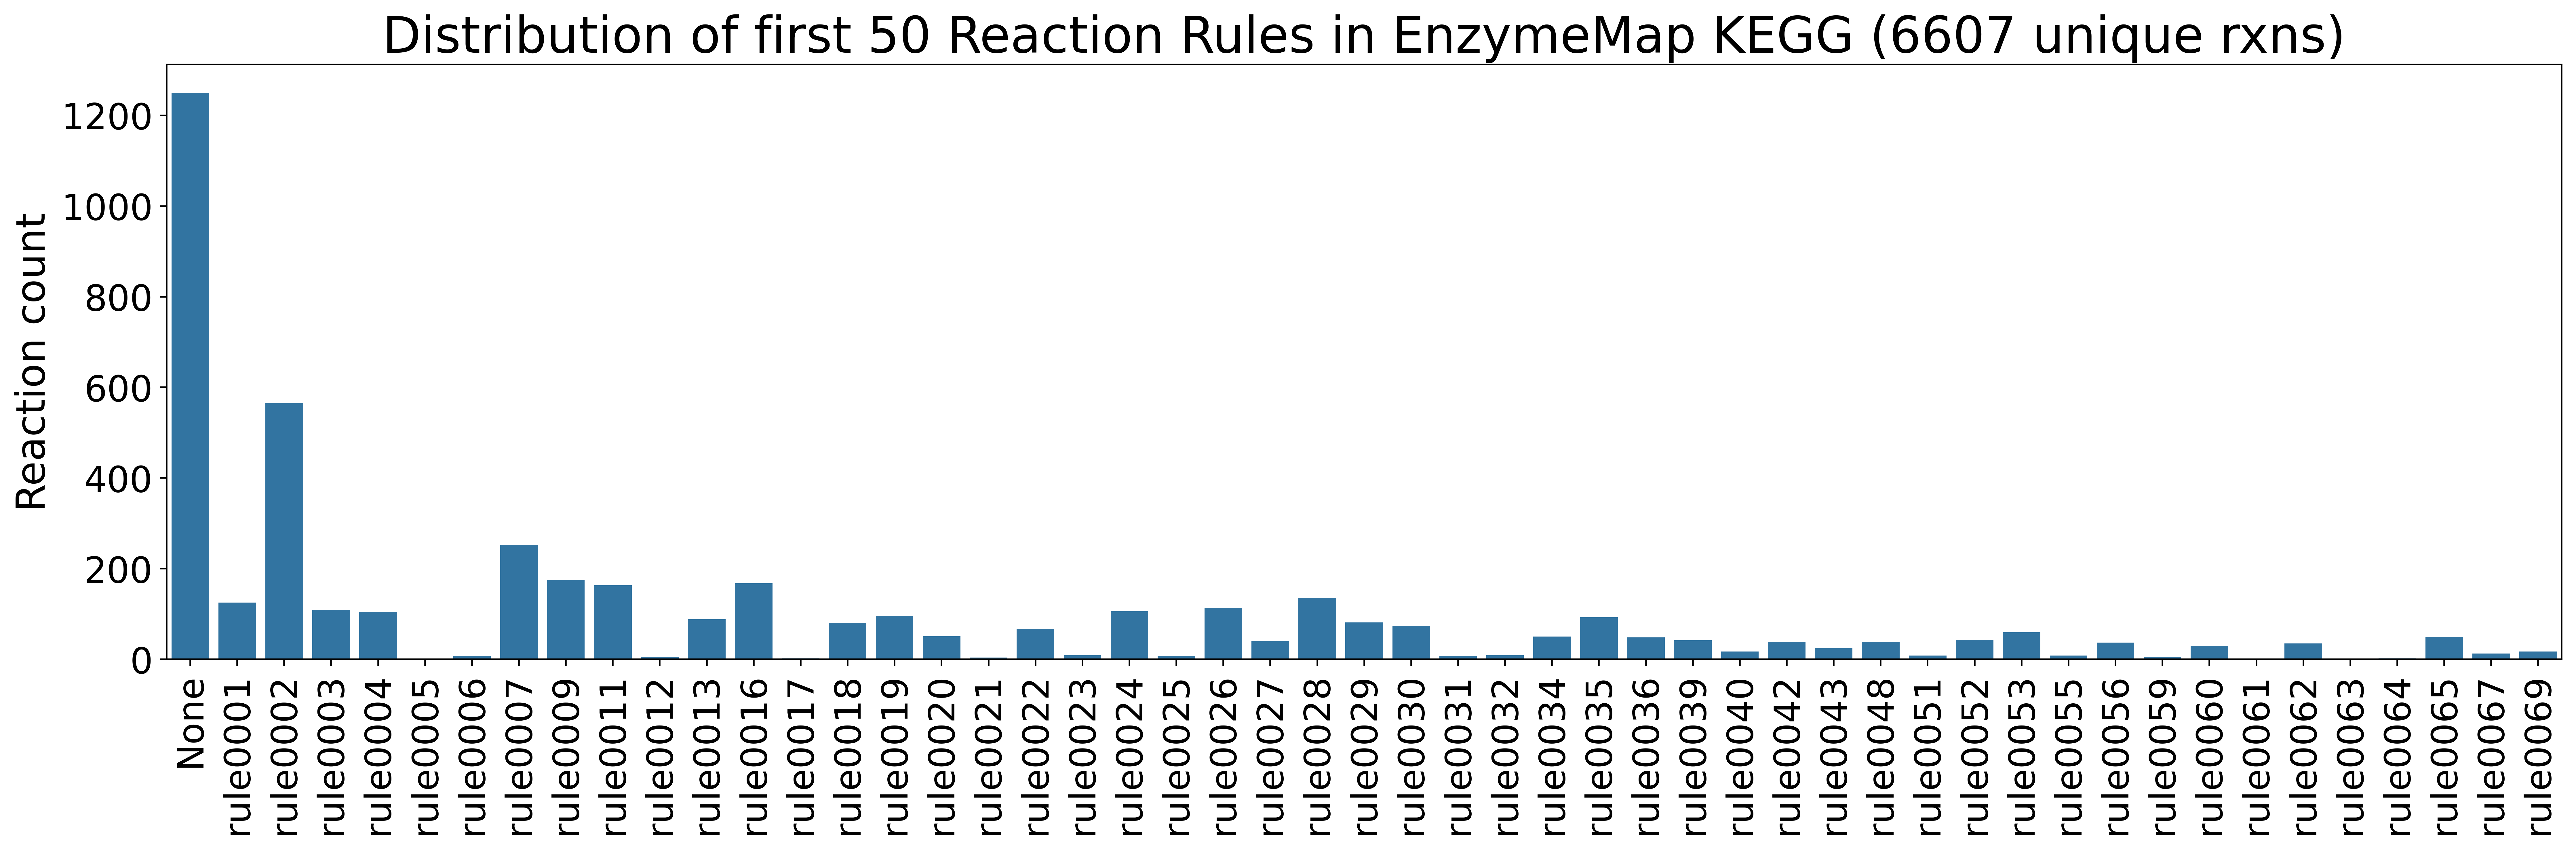

In [25]:
unique_rules = sorted(
    KEGG_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

plt.figure(figsize=(18,6))
sns.countplot(
    data=KEGG_df[KEGG_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title(f"Distribution of first 50 Reaction Rules in EnzymeMap KEGG ({KEGG_df.shape[0]} unique rxns)", size = 25)
plt.tight_layout()
plt.savefig("../plots/EnzymeMap_KEGG_JN_mapped_top50_distribution.png")
plt.show()

#### Visualizing the count distribution of MetaCyc reactions mapped to first 50 reaction rules

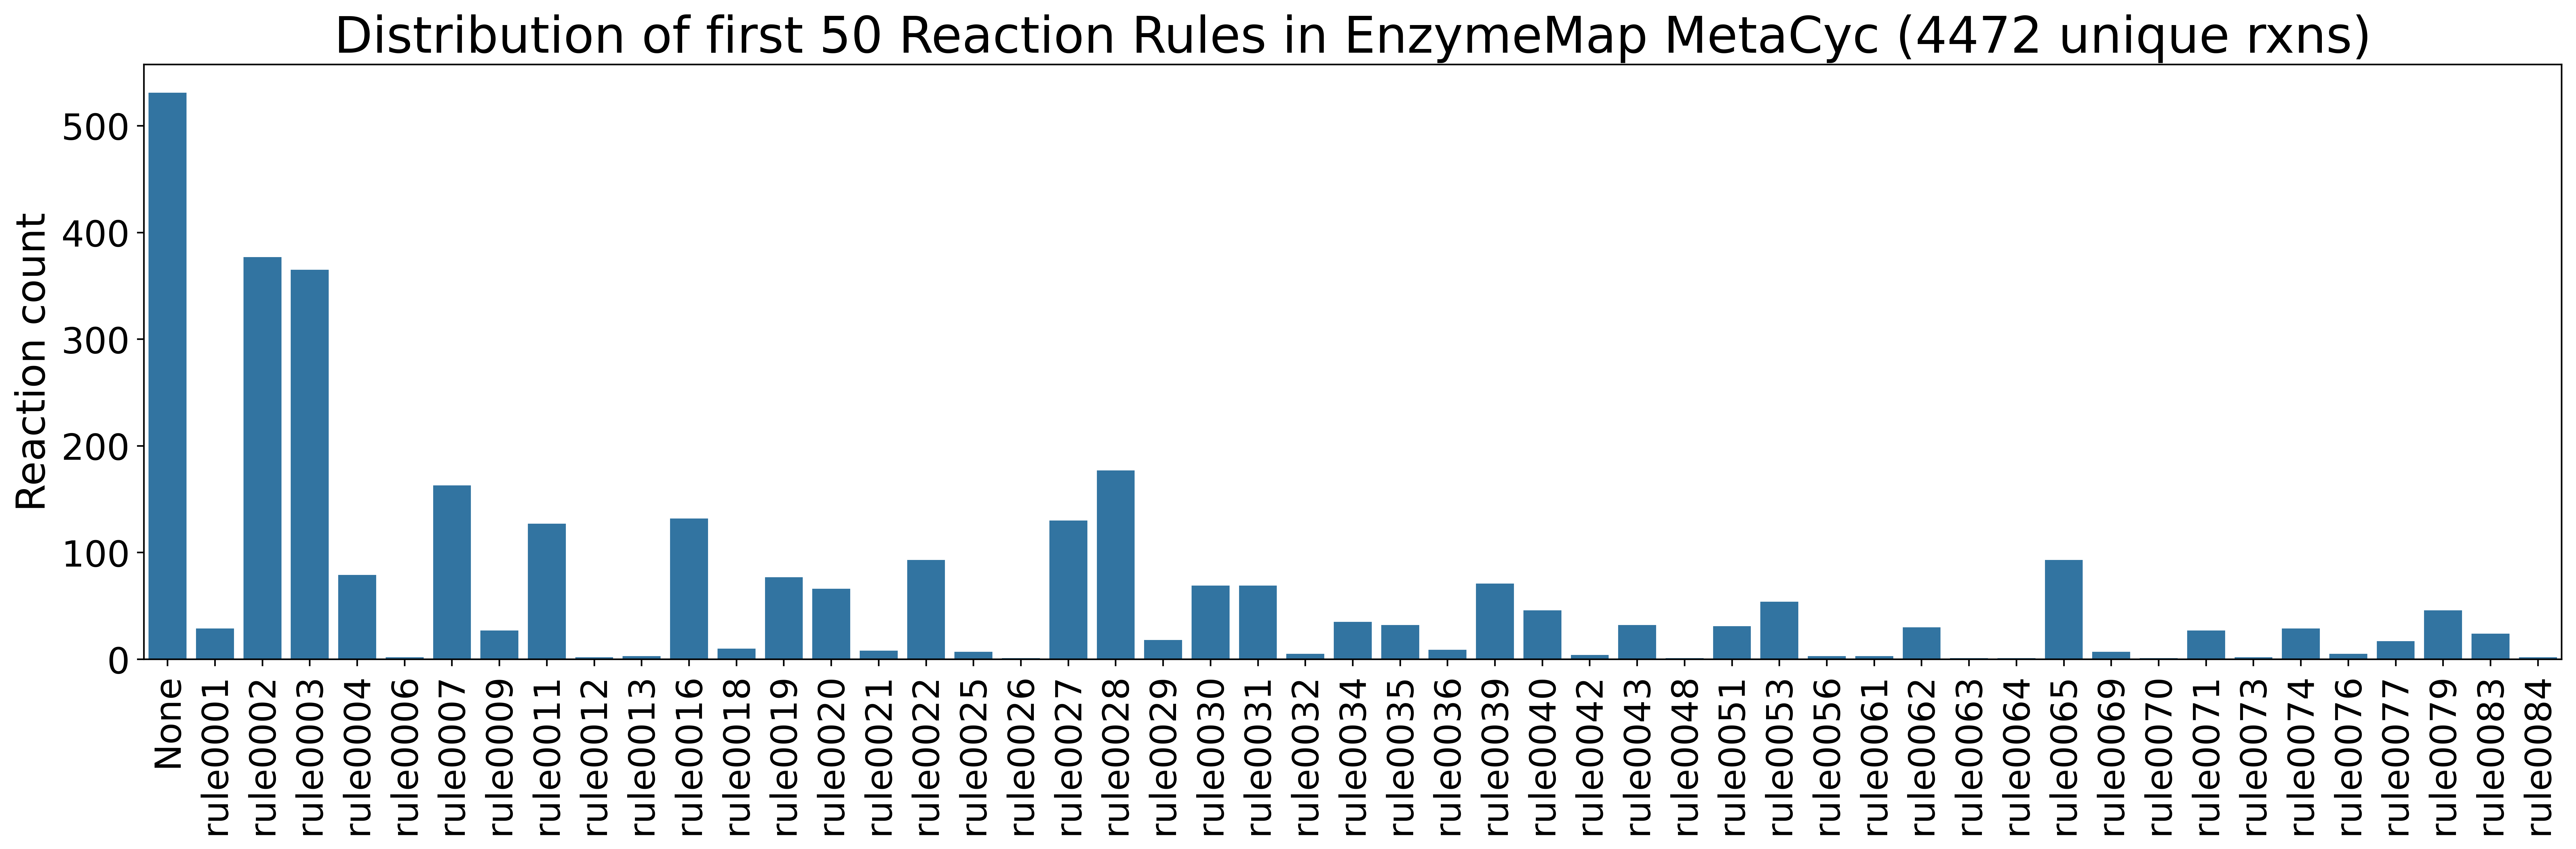

In [26]:
unique_rules = sorted(
    MetaCyc_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

plt.figure(figsize=(18,6))
sns.countplot(
    data=MetaCyc_df[MetaCyc_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title(f"Distribution of first 50 Reaction Rules in EnzymeMap MetaCyc ({MetaCyc_df.shape[0]} unique rxns)", size = 25)
plt.tight_layout()
plt.savefig("../plots/EnzymeMap_MetaCyc_JN_mapped_top50_distribution.png")
plt.show()

#### Visualizing the count distribution of BRENDA reactions mapped to first 50 reaction rules

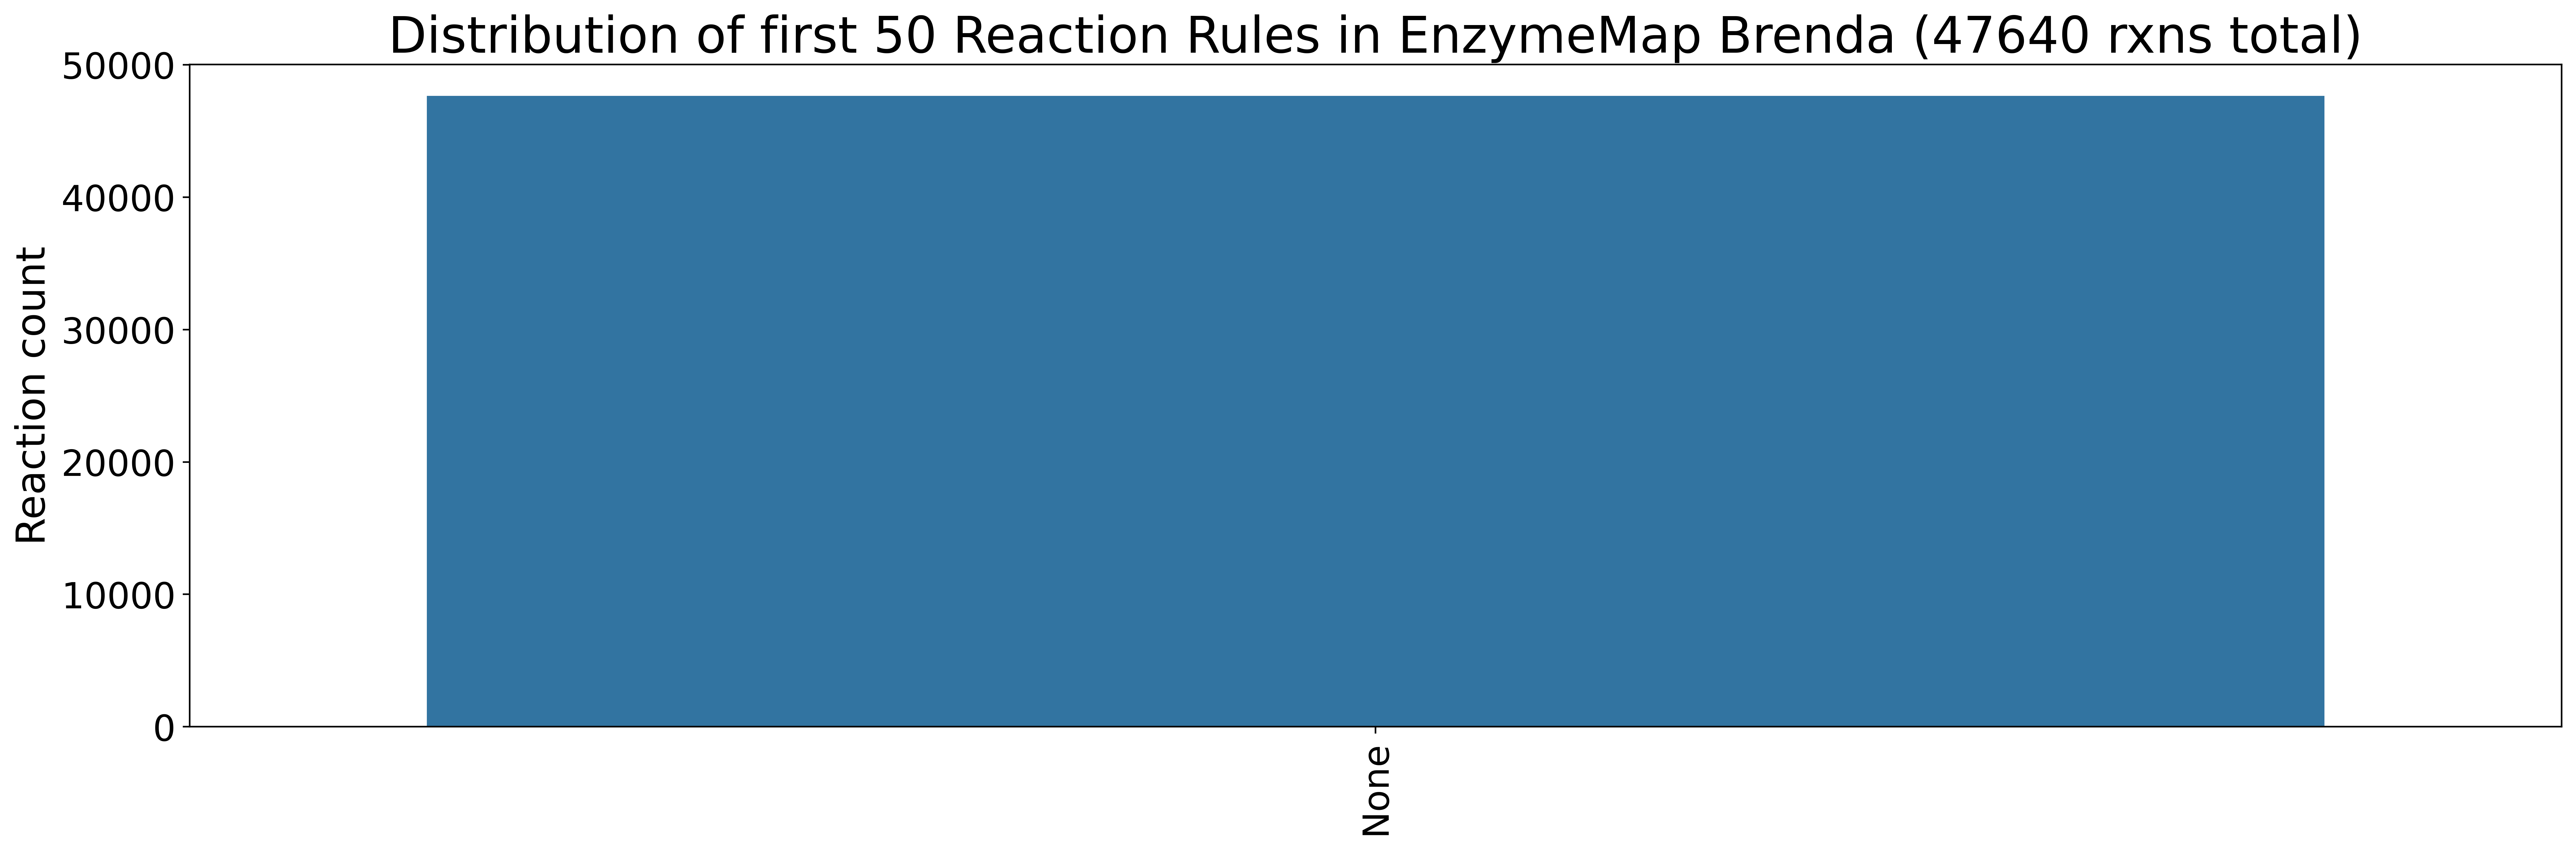

In [27]:
unique_rules = sorted(
    Brenda_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

plt.figure(figsize=(18,6))
sns.countplot(
    data=Brenda_df[Brenda_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title(f"Distribution of first 50 Reaction Rules in EnzymeMap Brenda ({Brenda_df.shape[0]} rxns total)", size = 25)
plt.tight_layout()
plt.savefig("../plots/EnzymeMap_Brenda_JN_mapped_top50_distribution.png")
plt.show()

In [15]:
MetaCyc_df[MetaCyc_df['top_mapped_operator']=='rule0023']

,rxn_idx,mapped,unmapped,orig_rxn_text,rule,rule_id,source,steps,quality,natural,organism,protein_refs,protein_db,ec_num,all_mapped_operators,top_mapped_operator
3474,1197,[O:11]=[CH:12][CH2:13][OH:14].[O:1]=[C:2]([CH2...,O=C(CO)COP(=O)([O-])[O-].O=CCO>>O=C(COP(=O)([O...,DARABALDOL-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.17,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3477,711,[CH3:1][C:2](=[O:3])[C:4](=[O:5])[O-:6].[O:7]=...,CC(=O)C(=O)[O-].O=CCO>>O=C([O-])C(=O)C[C@@H](O)CO,4.1.2.18-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.18,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3481,1618,[CH3:1][C:2](=[O:3])[C:4](=[O:5])[O-:6].[O:7]=...,CC(=O)C(=O)[O-].O=C[C@@H](O)C(=O)[O-]>>O=C([O-...,KDGALDOL-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.20,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3486,1932,[NH3+:9][CH2:10][C:11](=[O:12])[O-:13].[O:1]=[...,O=Cc1ccccc1.[NH3+]CC(=O)[O-]>>[NH3+][C@H](C(=O...,PHENYLSERINE-ALDOLASE-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.26,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3490,714,[CH3:1][C:2](=[O:3])[C:4](=[O:5])[O-:6].[O:7]=...,CC(=O)C(=O)[O-].O=CCO>>O=C([O-])C(=O)C[C@H](O)CO,4.1.2.28-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.28,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3493,1979,[CH3:1][CH2:2][CH:3]=[O:4].[CH3:5][CH2:6][CH:7...,CCC=O.CCC=O>>CCC(=O)C(O)CC,PROPIOIN-SYNTHASE-RXN,[#6:1].[#6:2]=[#8:3]>>[#6:1]-[#6:2]-[#8:3],91,direct,single,1.0,NaN,NaN,[],NaN,4.1.2.35,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3502,2047,[CH2:1]=[O:2].[O:3]=[C:4]([CH2:5][OH:6])[CH:7]...,C=O.O=C(CO)C(O)C(O)COP(=O)([O-])[O-]>>O=C(C(O)...,R10-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.43,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3507,1692,[CH3:1][CH:2]=[O:3].[NH3+:4][CH2:5][C:6](=[O:7...,CC=O.[NH3+]CC(=O)[O-]>>C[C@H](O)[C@H]([NH3+])C...,LTAA-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.48,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3509,6526,[NH3+:5][CH2:6][C:7](=[O:8])[O-:9].[O:1]=[CH:2...,O=CCO.[NH3+]CC(=O)[O-]>>[NH3+][C@H](C(=O)[O-])...,RXN0-6563,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.48,"[rule0023, rule0051, rule0255, rule0393]",rule0023
3511,6913,[CH3:1][CH:2]=[O:3].[NH3+:4][CH2:5][C:6](=[O:7...,CC=O.[NH3+]CC(=O)[O-]>>C[C@@H](O)[C@H]([NH3+])...,THREONINE-ALDOLASE-RXN,[#6:1]-[#6:2]-[#8:3]>>[#6:1].[#6:2]=[#8:3],92,direct reversed,single,1.0,NaN,NaN,[],NaN,4.1.2.48,"[rule0023, rule0051, rule0255, rule0393]",rule0023


In [13]:
set(list(Brenda_df['top_mapped_operator']))

{'None'}

In [7]:
import pandas as pd
from ipywidgets import interact, Dropdown, VBox, Output
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, rdChemReactions
from IPython.display import display, HTML

# --- SETTINGS ---
df = KEGG_df  # <-- your dataframe
rule_column = "top_mapped_operator"
mapped_column = "unmapped"  # RDKit SMARTS after mapping
text_column = "orig_rxn_text"  # <-- added column
reaction_size = (400, 200)


# --- UTIL FUNCTION ---
def draw_reaction_from_smarts(rxn_smarts: str):
    """Convert SMARTS → RDKit Reaction → PIL Image."""
    try:
        rxn = rdChemReactions.ReactionFromSmarts(rxn_smarts)
        if rxn is None:
            return None
        return Draw.ReactionToImage(rxn, subImgSize=reaction_size)
    except Exception:
        return None


# --- CALLBACK ---
def show_reactions_for_rule(selected_rule):
    out.clear_output()

    with out:
        subset = df[df[rule_column] == selected_rule]

        if subset.empty:
            print(f"No reactions found for {selected_rule}.")
            return

        print(f"{len(subset)} reactions mapped to {selected_rule}:\n")

        for _, row in subset.iterrows():
            rxn_smarts = row[mapped_column]
            rxn_text   = row[text_column]

            img = draw_reaction_from_smarts(rxn_smarts)

            if img:
                display(img)
            else:
                print(f"[Could not render reaction SMARTS]: {rxn_smarts}")

            # Print reaction text nicely under each image
            display(HTML(f"<div style='margin-bottom:20px; font-family:monospace; color:#444;'>{rxn_text}</div>"))

            # Divider for readability
            display(HTML("<hr style='border:0; border-top:1px solid #ccc;'>"))


# --- WIDGET SETUP ---
all_rules = sorted(df[rule_column].dropna().unique())

dropdown = Dropdown(
    options=all_rules,
    value=all_rules[0],
    description="Rule:",
    layout={"width": "300px"}
)

out = Output()
ui = VBox([dropdown, out])

def _update(change):
    show_reactions_for_rule(change["new"])

dropdown.observe(_update, names="value")

# initial call
show_reactions_for_rule(dropdown.value)
ui
